In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
datos = pd.read_excel('/content/VictimasVS_202309 (2).xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
datos.head(1)
#No necesito el codigo Dane,
#no necesito id caso
#no necesito id persona

,ID Caso,Código DANE de Municipio,Municipio,Departamento,Año,Mes,Día,ID Persona,Sexo,Etnia,Ocupación,Calidad de la Víctima o la Baja,Tipo de Población Vulnerable,Militante Político,Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente,Descripción Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente,Situación Actual de la Víctima,Edad,Latitud,Longitud
0,235240,17614,RIOSUCIO,CALDAS,1997,12,3,762455,HOMBRE,NaN,TRABAJO SIN ESPECIFICAR,CIVIL,FAMILIAR DE PERSONA VULNERABLE,NaN,NaN,NaN,MUERTA,NaN,5.423681,-75.70207


In [19]:
datos = datos.drop({'ID Caso','Código DANE de Municipio','ID Persona'}, axis = 1)

<Axes: >

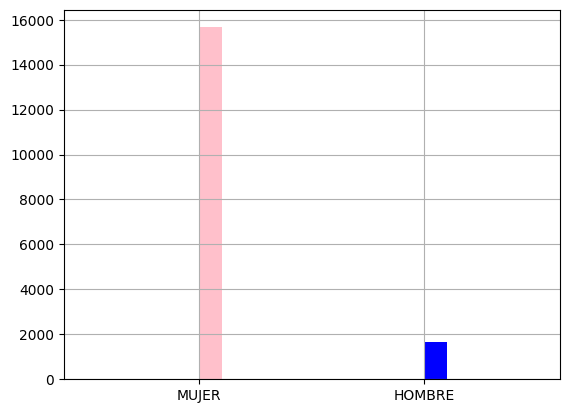

In [131]:
#La mayor cantidad de victimas fueron mujeres

datos.Sexo[datos.Sexo == 'MUJER'].hist(color='pink')
datos.Sexo[datos.Sexo == 'HOMBRE'].hist(color='blue')

<Axes: xlabel='Departamento'>

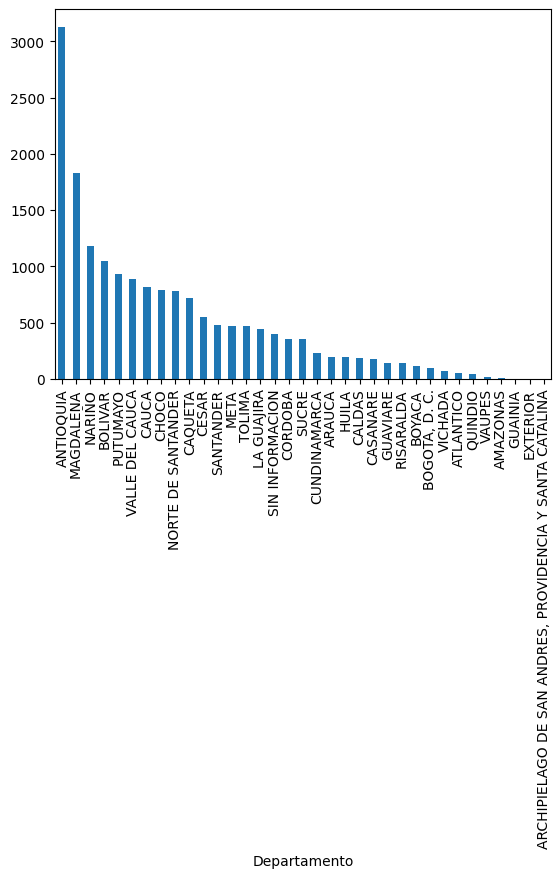

In [260]:
#Antioquia fue el departamento con más victimas

x=range(35)
label = datos.Departamento.unique()
plt.xticks(rotation='vertical', labels = label,ticks = x)

datos.Departamento.value_counts().sort_values(ascending =False).plot(kind ='bar')


<Axes: xlabel='Ocupación'>

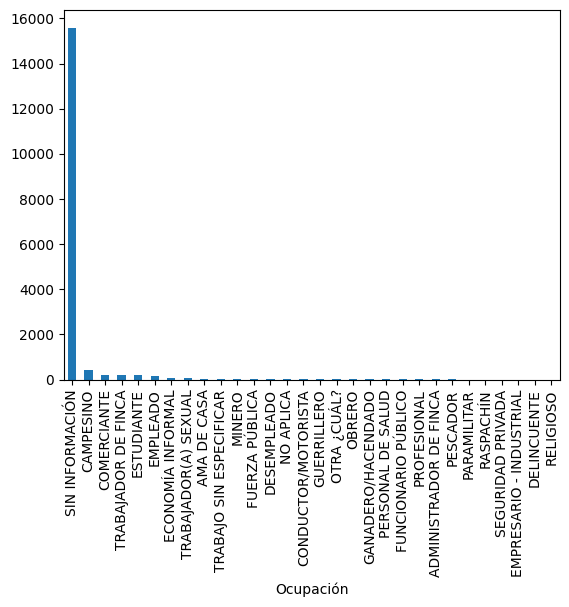

In [139]:
datos.Ocupación.value_counts().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='Ocupación', ylabel='Count'>

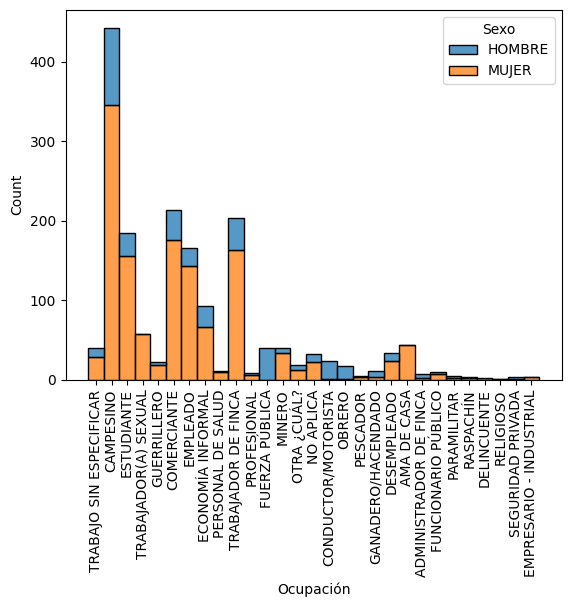

In [237]:
#Despues de las victimas sin información, se encontraron más victimas en las personas con ocupación de campesino

plt.xticks(rotation='vertical')
sns.histplot(
    datos,
    x = datos.Ocupación[datos.Ocupación != 'SIN INFORMACIÓN'],
    hue = datos.Sexo[datos.Sexo != 'SIN INFORMACION'],
    multiple = "stack"

)


1959.0 2023.0


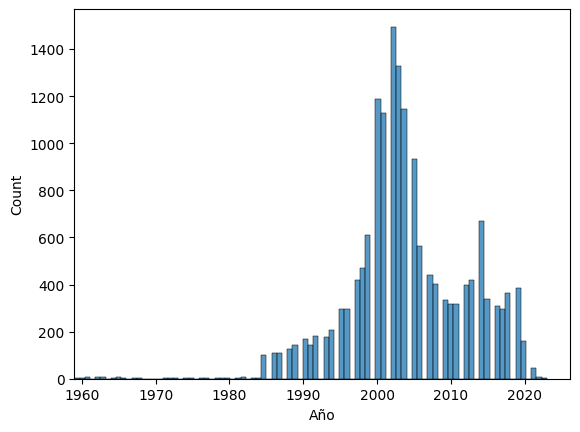

In [176]:
#Entre el 2000 y el 2005 aumentaron las victimas

sns.histplot(
    datos,
    x=datos.Año,
)
plt.xlim(min(datos.Año), None)
print(min(datos.Año), max(datos.Año))

In [170]:
datos.Año = datos.Año.replace('', np.nan).astype('float64')

In [ ]:
datos.Año.astype('float64')

<Axes: xlabel='Tipo de Población Vulnerable'>

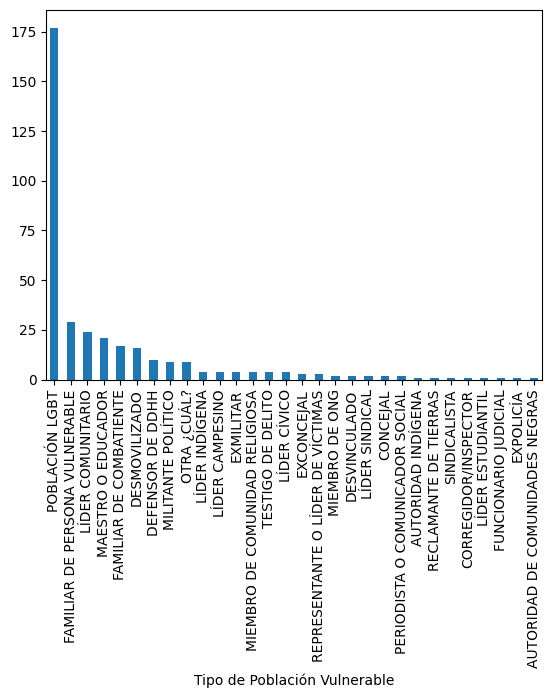

In [177]:
#La población con más victimas fue la LGBT

datos['Tipo de Población Vulnerable'].value_counts().sort_values(ascending=False).plot(kind='bar')


<Axes: >

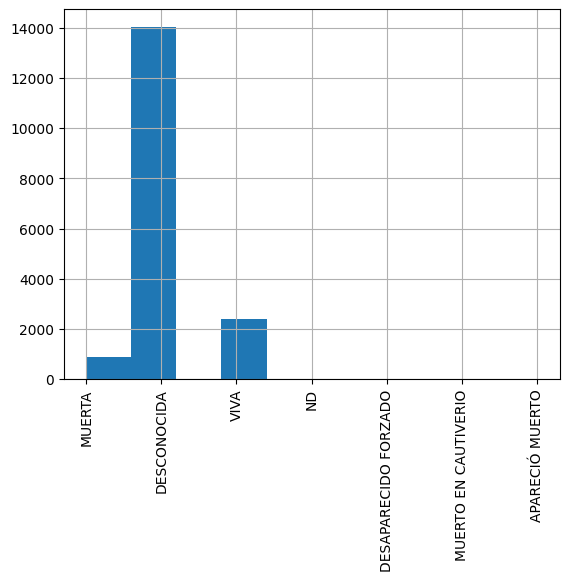

In [241]:
plt.xticks(rotation='vertical')
datos['Situación Actual de la Víctima'].hist()

#Se desconoce la mayoría del estado de las victimas

<Axes: xlabel='Edad'>

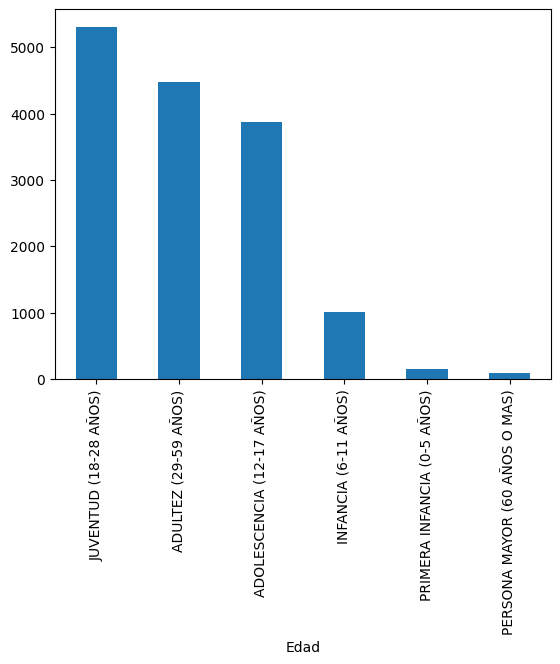

In [262]:
#La mayor cantidad de victimas tenían una edad entre (12, 28)
label = datos.Edad.unique()
x=range(len(datos.Edad.unique()))
plt.xticks(rotation='vertical', labels = label,ticks = x)

datos.Edad.value_counts().sort_values(ascending =False).plot(kind ='bar')


<Axes: >

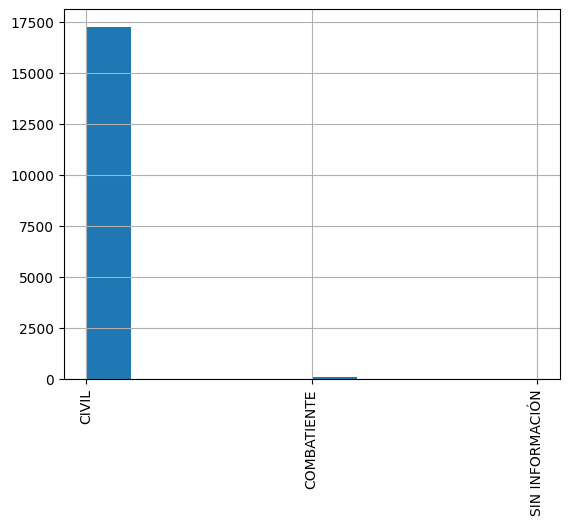

In [267]:
#Casi todas las victimas eran civiles
plt.xticks(rotation='vertical')
datos['Calidad de la Víctima o la Baja'].hist()

<Axes: >

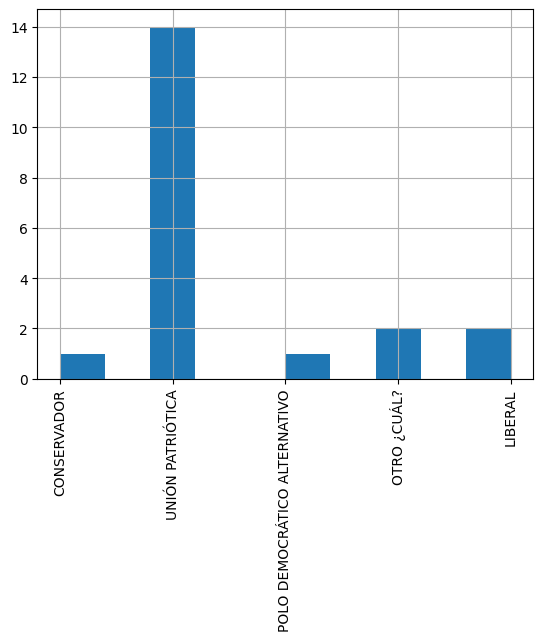

In [270]:
plt.xticks(rotation='vertical')
datos['Militante Político'].hist()

#La mayor parte de las victimas eran de la Unión patriotica

In [271]:
datos2 = datos.copy()

In [275]:
datos2 = datos.drop('Municipio', axis=1)

In [305]:
datos2 = datos.drop('Mes', axis=1)
datos2 = datos.drop('Día', axis=1)

In [288]:
from sklearn.preprocessing import LabelEncoder


In [306]:
label_encoder = LabelEncoder()
cat = datos2.select_dtypes('object').columns
for i in cat:
  datos2[i] = label_encoder.fit_transform(datos2[i])


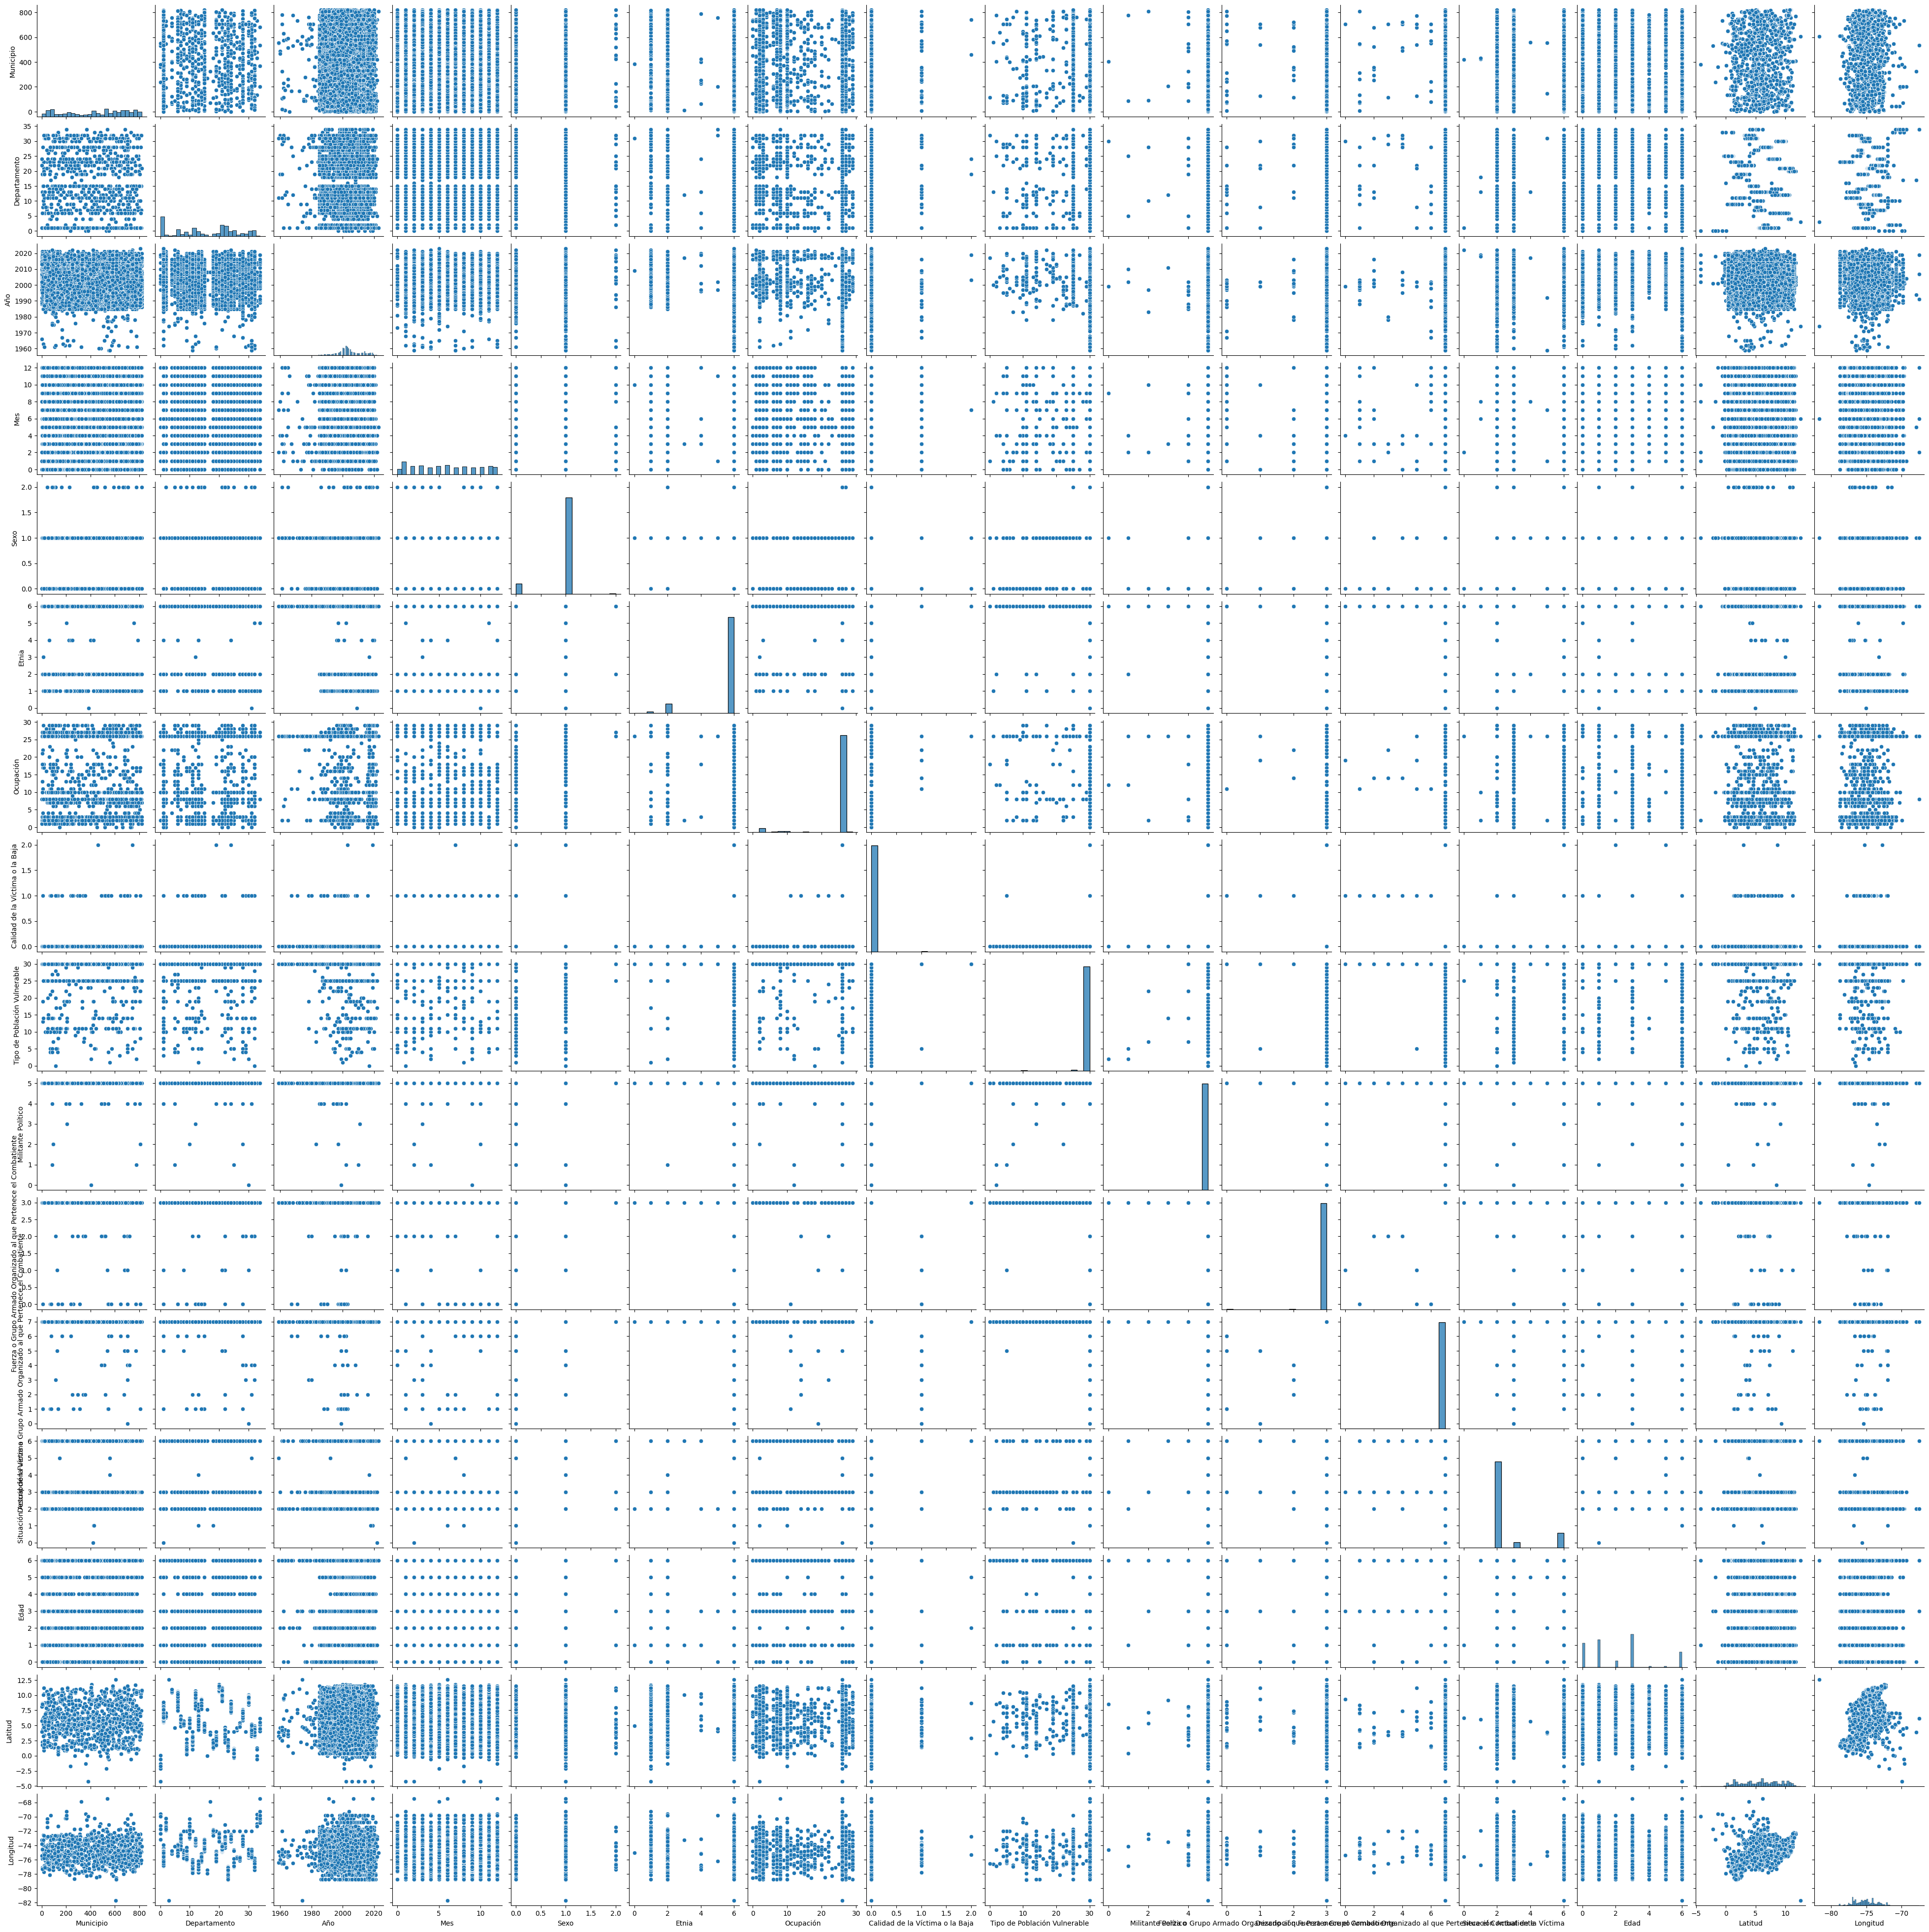

In [308]:
sns.pairplot(datos2)